### **Rental Apartments**

_**`Objective:`**_ 
This project aims to address two main sections of the problem related to apartment rentals in the USA:

1. _**`Price Prediction`**:_ The primary objective is to develop predictive model for apartment rental prices. By leveraging machine learning techniques such as regression, the goal is to accurately estimate the rental prices of apartments based on various features such as square footage, number of bathrooms and bedrooms, amenities, and location details. The prediction of rental prices is crucial for both renters and landlords in making informed decisions in the real estate market.

2. _**`Category Classification`**:_ The secondary objective involves classifying the category of classified listings. By employing classification algorithms, the aim is to categorize apartment listings into different groups based on their characteristics, such as type of property (e.g., apartment, house, condo). This classification task helps in organizing and understanding the diverse range of apartment listings, providing valuable insights for both users and stakeholders in the real estate industry.

_**`Additional information:`**_ Apartment for Rent Classified. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5X623. The dataset consist of 22 colum names.

>#### **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import  Counter
import warnings
warnings.filterwarnings('ignore')

>#### **Read DataFile**

In [2]:
path = r'C:\Users\andre\Desktop\nbaloyi4\projects\machine learning\rental+apartments\apartments_for_rent_classified_10K.csv'
df = pd.read_csv(path,sep=';', encoding='latin1')
df.columns = df.columns.map(lambda item: item.strip())

>#### **Data Summary**

In [3]:
df.describe(include='object')

,category,title,body,amenities,currency,fee,has_photo,pets_allowed,price_display,price_type,address,cityname,state,source
count,10000,10000,10000,6451,10000,10000,10000,5837,10000,10000,6673,9923,9923,10000
unique,3,9350,9961,2254,1,1,3,3,1726,3,6658,1574,51,12
top,housing/rent/apartment,Apartment in great location,"When searching for a pet-friendly One-, Two- a...",Parking,USD,No,Thumbnail,"Cats,Dogs","$1,350",Monthly,908 8th SW St,Austin,TX,RentLingo
freq,9996,40,6,229,10000,10000,8907,5228,86,9998,3,523,1737,6912


In [4]:
df.describe(exclude='object')

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


>#### ***Data Cleaning***

In [5]:
drop_cols = ['id','time','title', 'body','currency','fee','address','price_display', 'has_photo']
data = df.drop(columns=drop_cols)

#Data cleaning
data.category = data.category.map(lambda item: item.split('/')[-1])
# data.has_photo = data.has_photo.str.lower().map(lambda item: 'yes' if item == 'thumbnail' else item) #
data.price = pd.to_numeric(data.price,downcast='float', errors='coerce')
# data.rental_price = pd.to_numeric(data.price_display.str.replace('[^\d+]', '', regex=True),downcast='float', errors='coerce')
data.pets_allowed = data.pets_allowed.fillna('other').str.lower().map(lambda item: 'cats & dogs' if item=='cats,dogs' else item)
data.bedrooms = pd.to_numeric(data.bedrooms.fillna(0), downcast='integer', errors='coerce')
data.bathrooms = pd.to_numeric(data.bathrooms.fillna(0), downcast='integer', errors='coerce')
data.amenities = data.amenities.fillna(np.nan).str.lower().map(lambda item: 'yes' if isinstance(item, str) else 'no')
data.cityname = data.cityname.str.title()
data.state = data.state.str.upper()
data.source = data.source.str.lower()
data.price_type = data.price_type.str.lower()
data= data.where((data.bathrooms>=0) & (data.bedrooms>0)).dropna()
data.bedrooms = data.bedrooms.map(str)
data.bathrooms = data.bathrooms.map(str)
data = data[~data.duplicated()] #Removing duplicated values
data.rename(columns={'amenities': 'amenity', 'pets_allowed':'pets',
                     'cityname':'city',
                     'bathrooms':'bathroom', 'bedrooms':'bedroom'}
            , inplace=True)
data.head(4)

,category,amenity,bathroom,bedroom,pets,price,price_type,square_feet,city,state,latitude,longitude,source
1,apartment,no,0.0,1.0,other,425.0,monthly,106.0,Evansville,IN,37.9680,-87.6621,rentlingo
12,apartment,no,0.0,1.0,cats & dogs,1795.0,monthly,156.0,Tucson,AZ,32.2264,-110.9438,rentlingo
15,apartment,yes,1.0,1.0,cats & dogs,1560.0,weekly,200.0,New Bern,NC,35.0847,-77.0609,listedbuy
16,apartment,yes,1.0,1.0,cats & dogs,1560.0,monthly,200.0,New Bern,NC,35.0960,-77.0272,rentdigs.com


>#### **EDA - Data Analysis**

<Figure size 800x400 with 0 Axes>

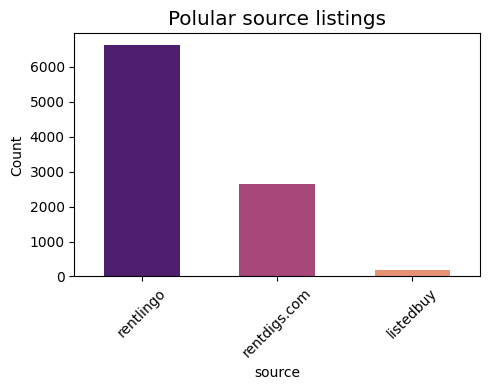

In [6]:
#Popular rental listing hosts/sources

plt.figure(figsize=(8,4))


fig, ax = plt.subplots(1,1,figsize=(5,4))
plt.style.use('ggplot')
popular_listings = pd.DataFrame(Counter(data.source).most_common(3), columns=['source', 'count'])
sns.barplot(popular_listings,x='source', y='count',gap=0.3, hue='source', palette='magma', ax=ax)
plt.xticks(rotation=45)
ax.set_title('Polular source listings')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

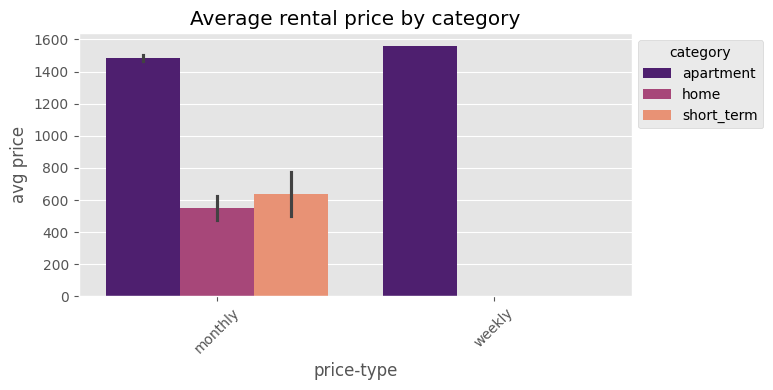

In [7]:
# Rental price by category
fig, ax = plt.subplots(1,1,figsize=(8,4))
plt.style.use('ggplot')
sns.barplot(data,x='price_type', y='price',hue='category', palette='magma', ax=ax)
plt.xticks(rotation=45)
ax.set_title('Average rental price by category')
ax.set_ylabel('avg price')
ax.set_xlabel('price-type')
ax.legend(title='category',bbox_to_anchor=(1.25,1))
plt.tight_layout()
plt.show()

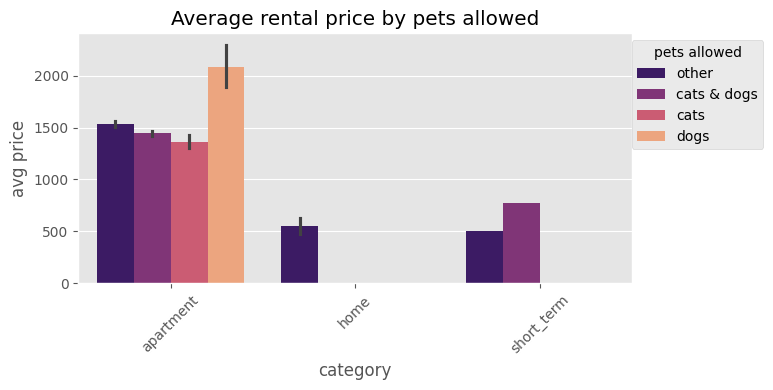

In [8]:
# Rental price by pets allowed
fig, ax = plt.subplots(1,1,figsize=(8,4))
plt.style.use('ggplot')
sns.barplot(data,x='category', y='price',hue='pets', palette='magma', ax=ax)
plt.xticks(rotation=45)
ax.set_title('Average rental price by pets allowed')
ax.set_ylabel('avg price')
ax.set_xlabel('category')
ax.legend(title='pets allowed',bbox_to_anchor=(1.25,1))
plt.tight_layout()
plt.show()

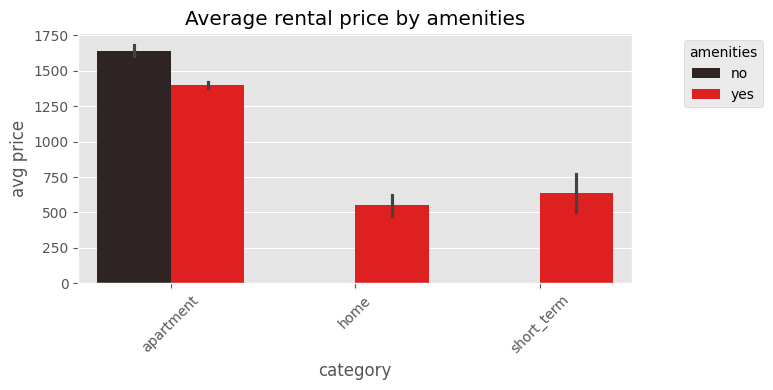

In [9]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
plt.style.use('ggplot')
sns.barplot(data,x='category', y='price',hue='amenity', color='red', ax=ax)
plt.xticks(rotation=45)
ax.set_title('Average rental price by amenities')
ax.set_ylabel('avg price')
ax.set_xlabel('category')
ax.legend(title='amenities',bbox_to_anchor=(1.25,1))
plt.tight_layout()
plt.show()

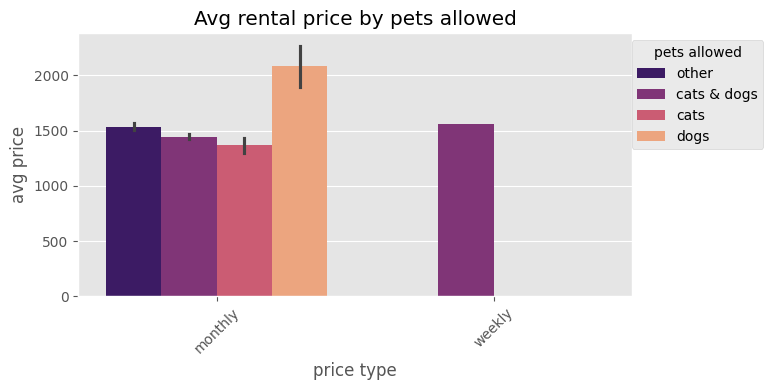

In [10]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
plt.style.use('ggplot')
sns.barplot(data,x='price_type', y='price',hue='pets', palette='magma', ax=ax)
plt.xticks(rotation=45)
ax.set_title('Avg rental price by pets allowed')
ax.set_ylabel('avg price')
ax.set_xlabel('price type')
ax.legend(title='pets allowed',bbox_to_anchor=(1.25,1))
plt.tight_layout()
plt.show()

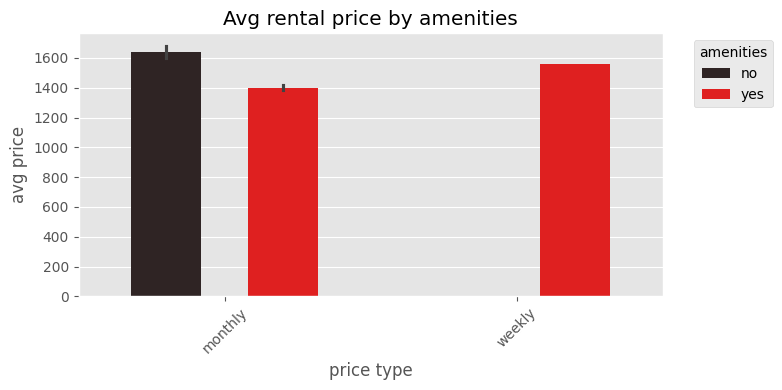

In [11]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
plt.style.use('ggplot')
sns.barplot(data,x='price_type', y='price',gap=0.4,hue='amenity', color='red', ax=ax)
plt.xticks(rotation=45)
ax.set_title('Avg rental price by amenities')
ax.set_ylabel('avg price')
ax.set_xlabel('price type')
ax.legend(title='amenities',bbox_to_anchor=(1.2,1))
plt.tight_layout()
plt.show()

In [12]:
data.groupby(['category'])['price'].mean()

category
apartment     1485.005249
home           550.000000
short_term     637.500000
Name: price, dtype: float32

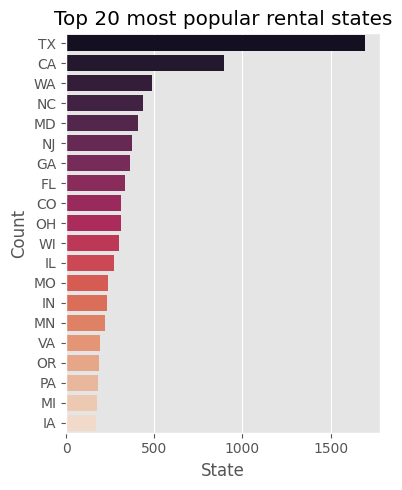

In [13]:
# Top 20 most popular rental states
fig, ax = plt.subplots(1,1,figsize=(4,5))
plt.style.use('ggplot')
popular_listings = pd.DataFrame(Counter(data.state).most_common(20), columns=['state', 'count'])
sns.barplot(popular_listings,y='state', x='count', hue='state', palette='rocket', ax=ax)
ax.set_title('Top 20 most popular rental states')
ax.set_ylabel('Count')
ax.set_xlabel('State')
plt.tight_layout()
plt.show()


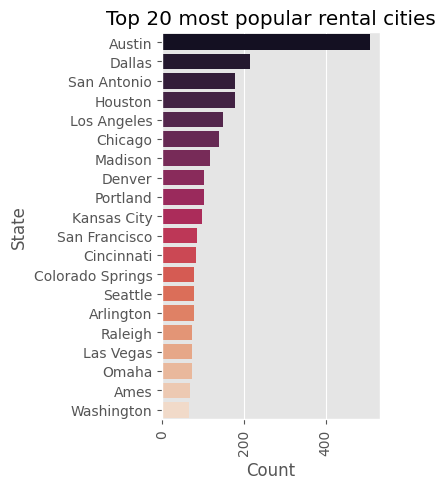

In [14]:

#Top 10 most popular rental cities
fig, ax = plt.subplots(1,1,figsize=(4,5))
plt.style.use('ggplot')
popular_listings = pd.DataFrame(Counter(data.city).most_common(20), columns=['city', 'count'])

sns.barplot(popular_listings,y='city', x='count', hue='city',palette='rocket', ax=ax)
plt.xticks(rotation=90)
ax.set_title('Top 20 most popular rental cities')
ax.set_xlabel('Count')
ax.set_ylabel('State')
plt.tight_layout()
plt.show()

#Prefered rentals by bedrooms and bathrooms


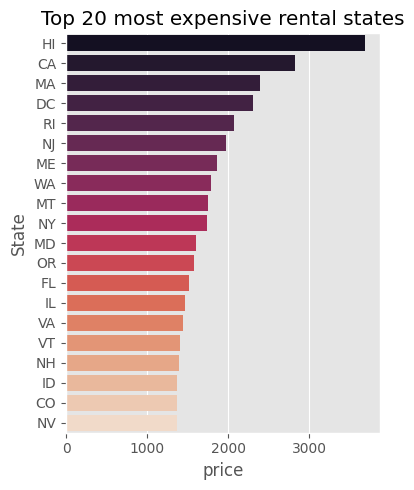

In [15]:
ex_state = data.groupby(['state'])['price'].agg(['mean']).sort_values('mean', ascending=False).reset_index().head(20)

fig, ax = plt.subplots(1,1,figsize=(4,5))
plt.style.use('ggplot')
sns.barplot(ex_state,y='state', x='mean',hue='state',palette='rocket', ax=ax)
ax.set_title('Top 20 most expensive rental states')
ax.set_xlabel('price')
ax.set_ylabel('State')
plt.tight_layout()
plt.show()
# expensive_state

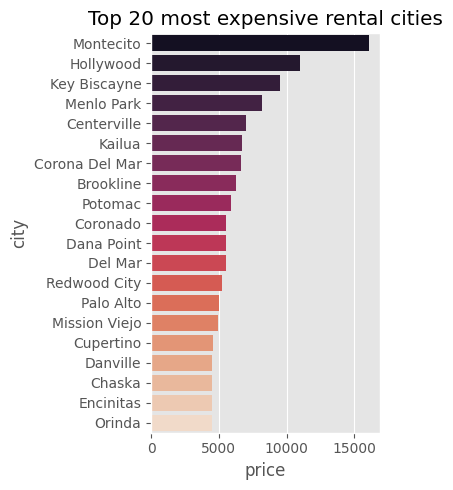

In [16]:
ex_city = data.groupby(['city'])['price'].agg(['mean']).sort_values('mean', ascending=False).reset_index().head(20)

fig, ax = plt.subplots(1,1,figsize=(4,5))
plt.style.use('ggplot')
sns.barplot(ex_city,y='city', x='mean',hue='city',palette='rocket', ax=ax)
ax.set_title('Top 20 most expensive rental cities')
ax.set_xlabel('price')
ax.set_ylabel('city')
plt.tight_layout()
plt.show()
# expensive_

>#### Building Models

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost

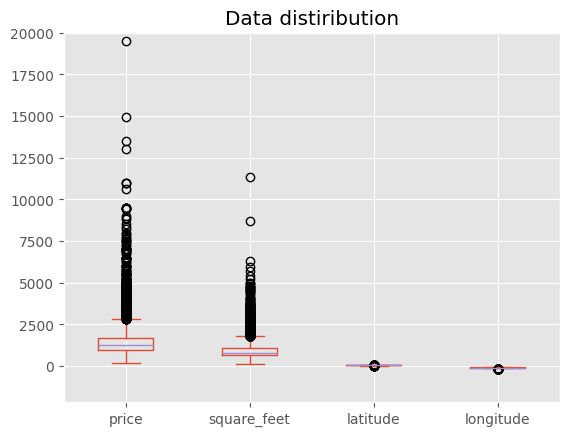

In [18]:
#Numerical data distribution
data.plot.box()
plt.ylim(top=20000)
plt.title('Data distiribution')
plt.show()


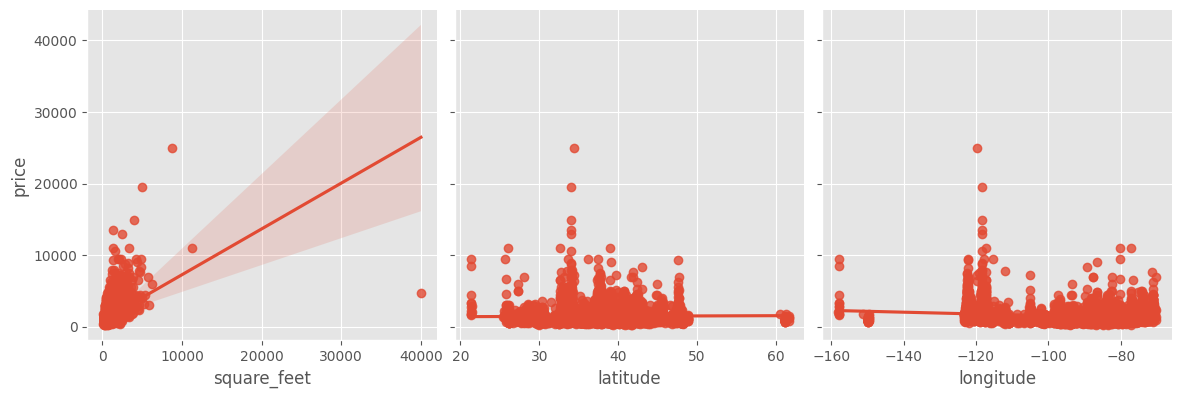

In [19]:
#Extract relationships for numerical data
numerical_data = data.select_dtypes(exclude='object')
sns.pairplot(numerical_data,y_vars='price',x_vars=['square_feet', 'latitude', 'longitude'], kind='reg',height=4)

<Axes: >

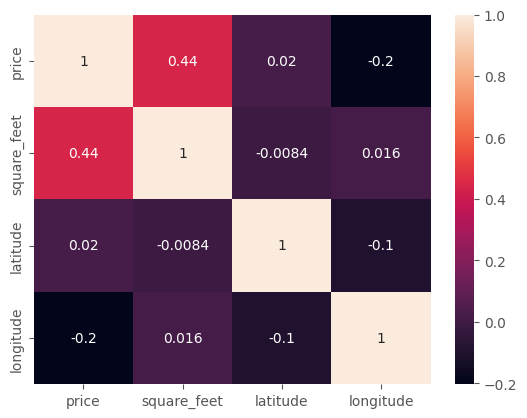

In [20]:
# feature importance
sns.heatmap(numerical_data.corr(), annot=True)

In [21]:
#Data Scaling and Encoding
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder


model_data = data.drop(columns=['city']) #drop City because of its high cardinal categorical values
encoder = LabelEncoder()
st_scaler = StandardScaler()
binarizer = LabelBinarizer()
one_hot = OneHotEncoder()

for col in model_data.select_dtypes(exclude='object').columns:
    if col=='price': continue
    model_data[col] = st_scaler.fit_transform(model_data[col].values.reshape(-1,1))
    
for col in model_data.select_dtypes(include='object').columns:
    values = model_data.loc[:, [col]].values
    model_data[col] =  one_hot.fit_transform(values).toarray()
    

    
features = model_data.drop(columns=['price'])
# target = st_scaler.fit_transform(model_data.iloc['price'])
target =st_scaler.fit_transform(model_data.loc[ :, ['price']])
model_data.price = target
# features.drop(['category', 'amenity','bathroom', 'bedroom', 'pets','price_type','source',], axis=1, inplace=True)

#Training and Testing split
X_train, X_test, y_train, y_test= train_test_split(features, target, test_size=0.2, random_state=42)

In [22]:
import statsmodels.api as sm
# price ~ latitude + longitude + square_feet + category + amenity + bathroom + bedroom + pets + price_type +source

lr = sm.OLS.from_formula("price ~ longitude + square_feet + amenity", data=model_data)#, drop_cols=['category', 'amenity','bathroom', 'bedroom', 'pets','price_type','source'])
results = lr.fit()
print(results.summary())

# lr_training_data

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     1013.
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:05:29   Log-Likelihood:                -12261.
No. Observations:                9571   AIC:                         2.453e+04
Df Residuals:                    9567   BIC:                         2.456e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0188      0.011     -1.690      

In [23]:
#Model pipeline

rf = RandomForestRegressor(n_estimators=1000,criterion='squared_error')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
# print(y_pred)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))

0.645308626489254
0.2946947377263217
0.5641308113616552


In [24]:
xgr = xgboost.XGBRegressor(n_estimators=1000)

xgr.fit(X_train, y_train)
y_pred = xgr.predict(X_test)
# print(y_pred)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))

0.6132763616443682
0.29917946
0.5890537


In [25]:
xgr = xgboost.XGBRFRegressor(n_estimators=1000)

xgr.fit(X_train, y_train)
y_pred = xgr.predict(X_test)
# print(y_pred)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))

0.5665687887380715
0.36293098
0.6236122


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor(n_estimators=1000)

gr.fit(X_train, y_train)
y_pred = gr.predict(X_test)
# print(y_pred)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))

0.5853278404015708
0.2975627311396313
0.6099678523692259
